# AER615 Project 2
This project involves writing a program that analyzes the climb performance of a Piper Cherokee. The program works by inputting the various altitudes desired, and depending on the function calls returns various plots and data at those altitudes.

Program usage is demonstrated below:

In [1]:
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import numpy as np
import pandas as pd

from climb_analysis import climb_analysis

In [2]:
altitudes = [5000, 10000, 15000] # in feet
ca = climb_analysis(altitudes)

## Part 1 - Plotting Maximum Attainable Rate of Climb

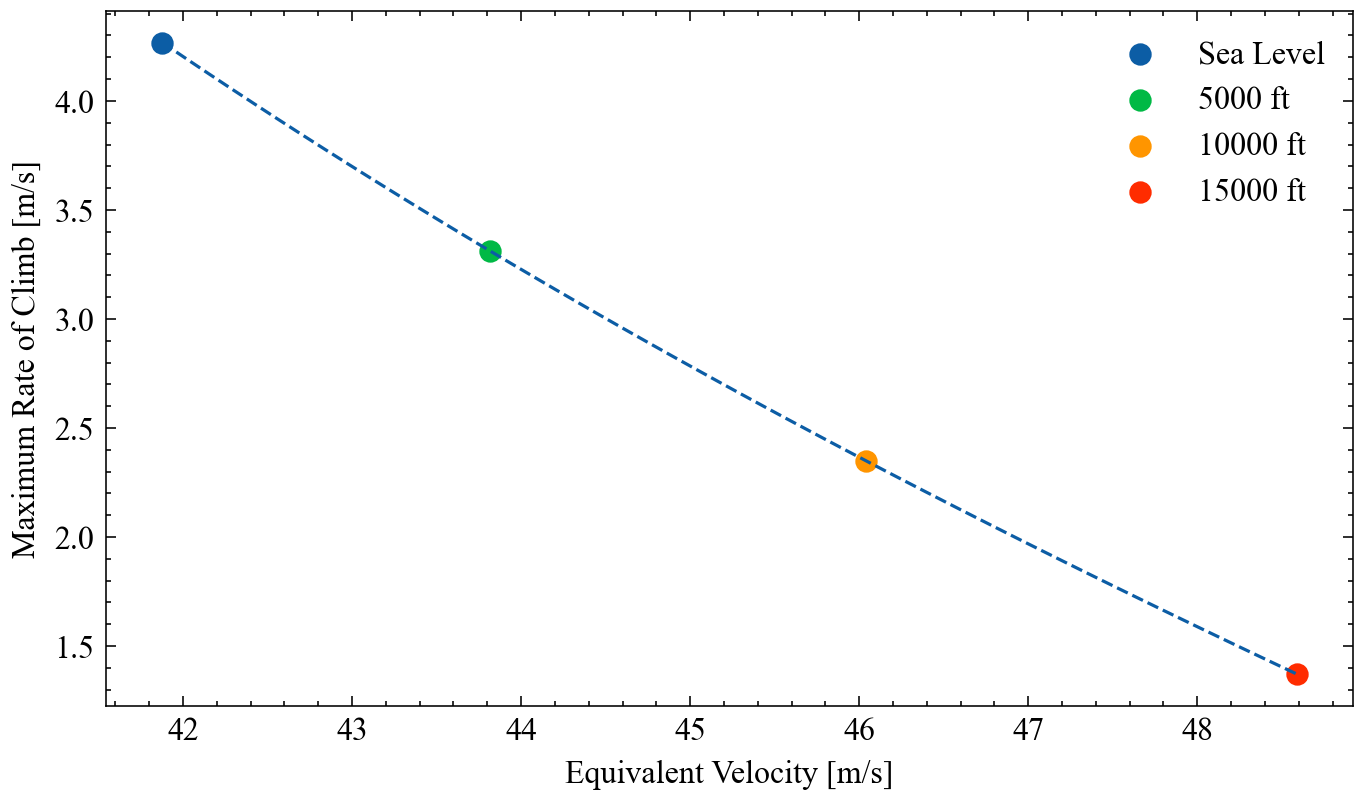

Spline coefficients:  [4.26782383 3.0907023  2.18918278 1.37206328]


In [3]:
ca.max_roc(metric=True, mode='plot')

In [4]:
ca.max_roc(metric=True, mode='data')

   Altitude [m]  Equivalent Velocity [m/s]  Maximum Rate of Climb [m/s]
0           0.0                  41.877423                     4.267824
1        1524.0                  43.814421                     3.312736
2        3048.0                  46.039145                     2.350058
3        4572.0                  48.587593                     1.372063


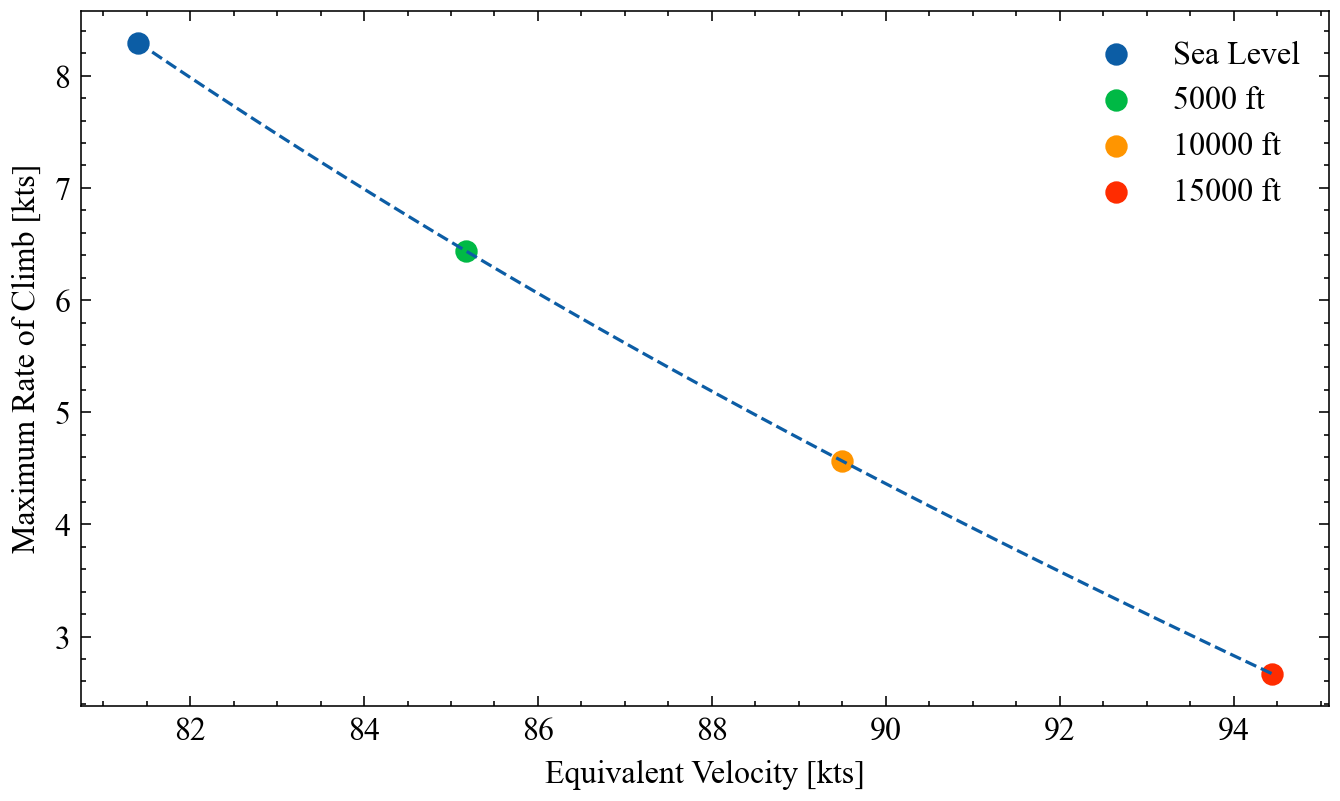

Spline coefficients:  [8.29596668 6.00783075 4.25542106 2.66707149]


In [5]:
ca.max_roc(metric=False, mode='plot')

In [6]:
ca.max_roc(metric=False, mode='data')

   Altitude [ft]  Equivalent Velocity [kts]  Maximum Rate of Climb [kts]
0            0.0                  81.403010                     8.295967
1         5000.0                  85.168225                     6.439428
2        10000.0                  89.492731                     4.568136
3        15000.0                  94.446506                     2.667071


## Part 2 - Plotting Hodographs

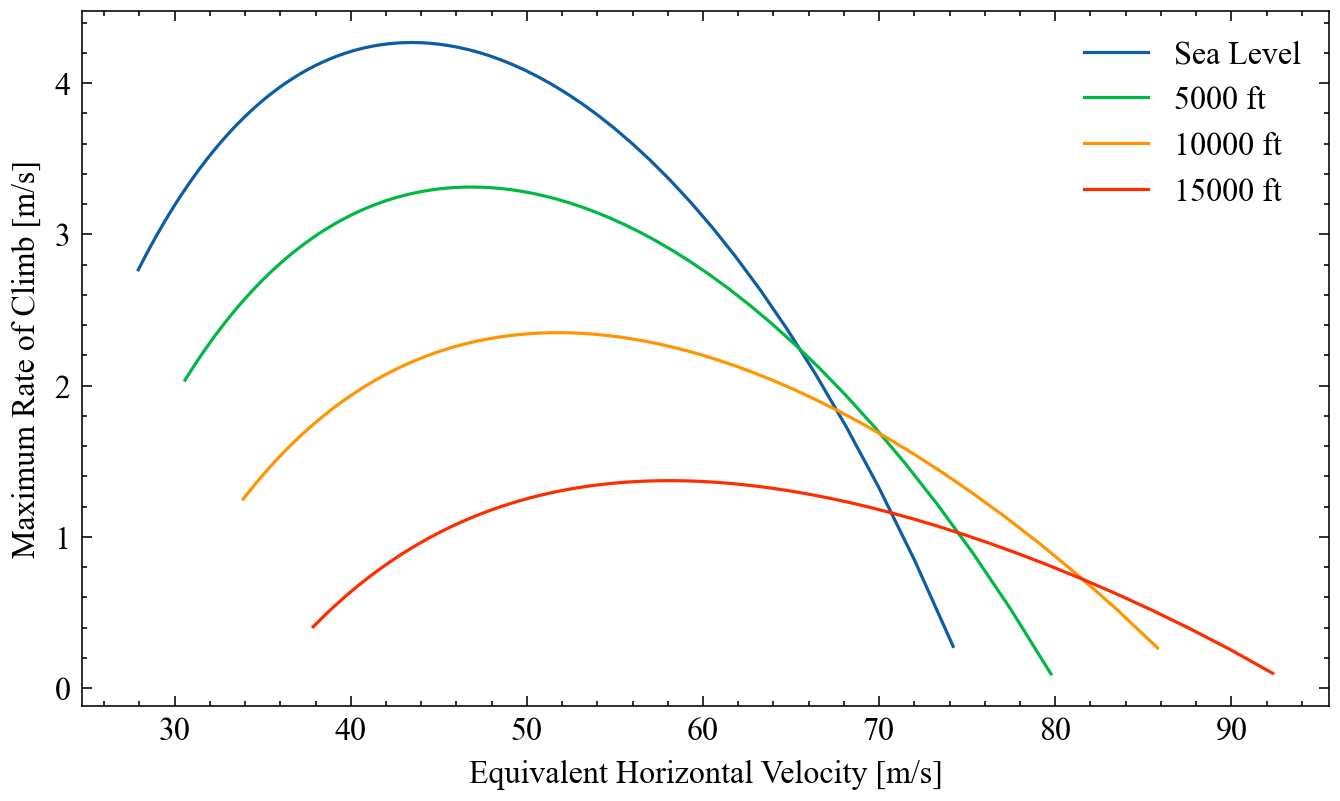

In [7]:
ca.hodograph(metric=True, mode='plot')

In [8]:
ca.hodograph(metric=True, mode='data')

    True Velocity [kts]   0.0 [m]  1524.0 [m]  3048.0 [m]  4572.0 [m]
0             27.588137  2.765763    2.036874    1.250091    0.406065
1             27.709043  2.794436    2.063297    1.274691    0.429311
2             27.831552  2.823126    2.089711    1.299262    0.452511
3             27.955701  2.851830    2.116113    1.323799    0.475662
4             28.081526  2.880544    2.142499    1.348299    0.498759
5             28.209066  2.909265    2.168866    1.372758    0.521797
6             28.338359  2.937991    2.195209    1.397172    0.544772
7             28.469447  2.966717    2.221526    1.421536    0.567681
8             28.602370  2.995440    2.247811    1.445847    0.590516
9             28.737173  3.024156    2.274061    1.470099    0.613274
10            28.873901  3.052860    2.300270    1.494287    0.635949
11            29.012598  3.081548    2.326434    1.518406    0.658536
12            29.153314  3.110216    2.352547    1.542451    0.681027
13            29.296

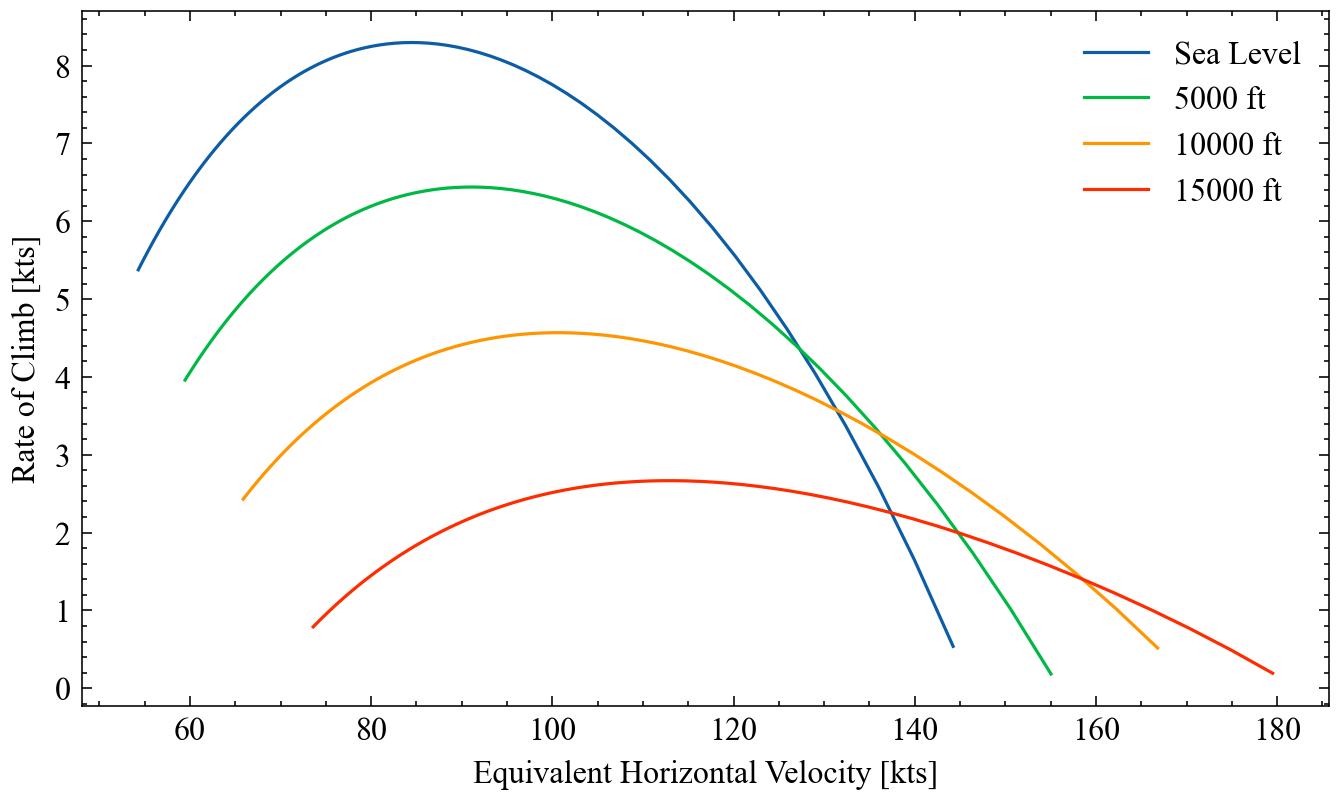

In [9]:
ca.hodograph(metric=False, mode='plot')

In [10]:
ca.hodograph(metric=False, mode='data')

    True Velocity [kts]    0 [ft]  5000 [ft]  10000 [ft]  15000 [ft]
0             53.626924  5.376201   3.959357    2.429977    0.789324
1             53.861945  5.431937   4.010719    2.477796    0.834512
2             54.100084  5.487705   4.062064    2.525557    0.879610
3             54.341410  5.543500   4.113385    2.573253    0.924611
4             54.585994  5.599316   4.164675    2.620877    0.969507
5             54.833910  5.655146   4.215928    2.668422    1.014290
6             55.085236  5.710984   4.267136    2.715879    1.058950
7             55.340049  5.766823   4.318291    2.763239    1.103480
8             55.598431  5.822656   4.369385    2.810495    1.147869
9             55.860467  5.878475   4.420410    2.857637    1.192107
10            56.126243  5.934271   4.471356    2.904655    1.236184
11            56.395849  5.990037   4.522215    2.951539    1.280088
12            56.669378  6.045763   4.572976    2.998277    1.323807
13            56.946926  6.101439 

## Part 3 - Plotting Maximum Rate of Climb vs. Altitude

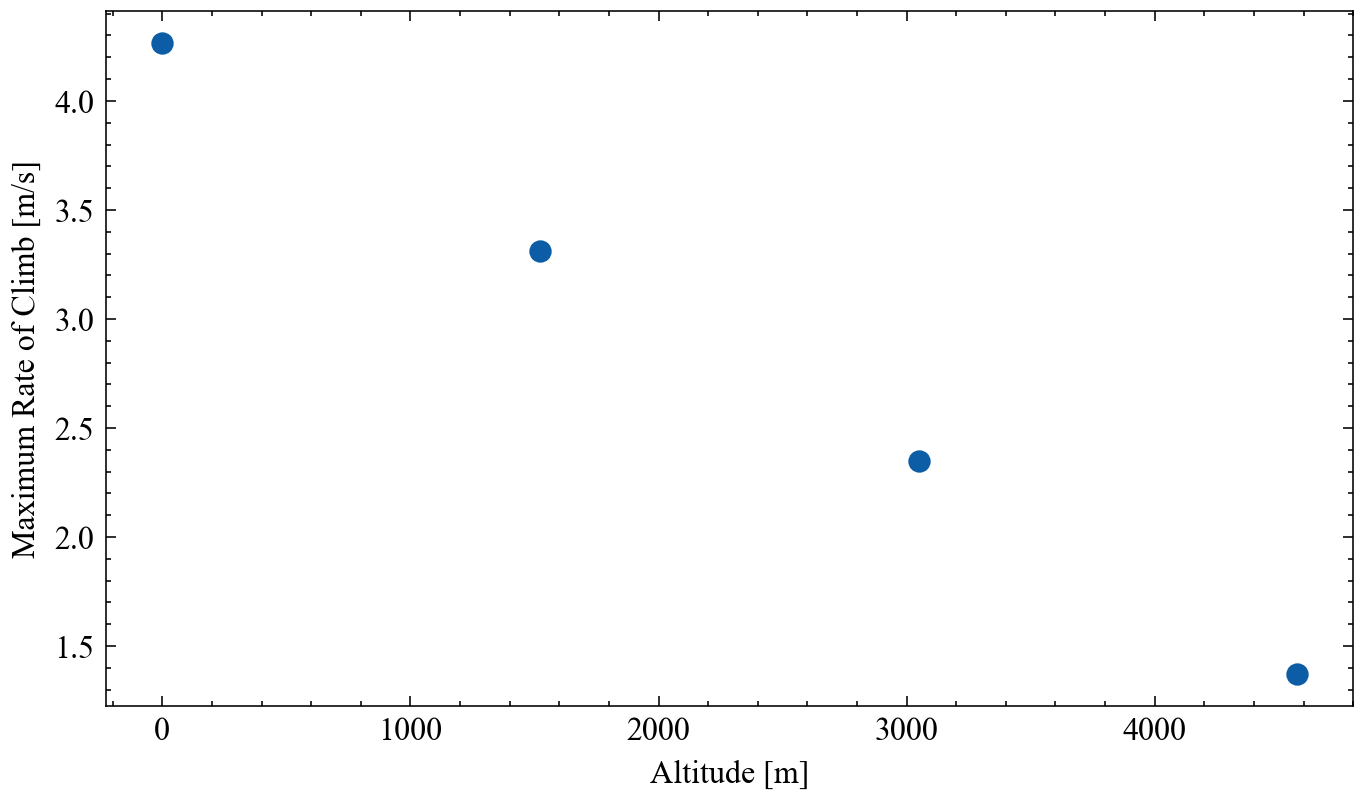

In [11]:
ca.ceilings(metric=True)

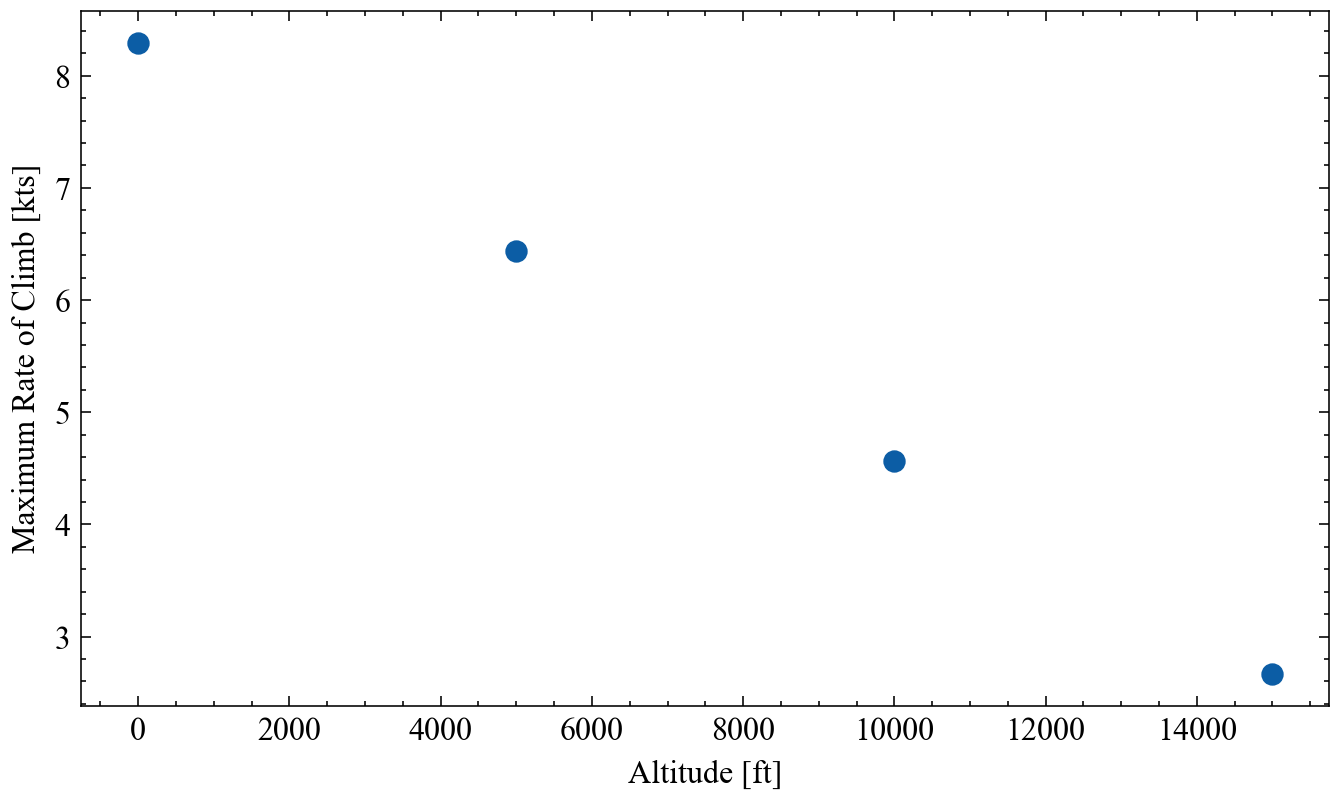

In [12]:
ca.ceilings(metric=False)

## Part 4 - Plotting Time to Climb to Altitude

## Part 5 - Plotting Steepest Climb Rate

## Miscellaneous Stuff

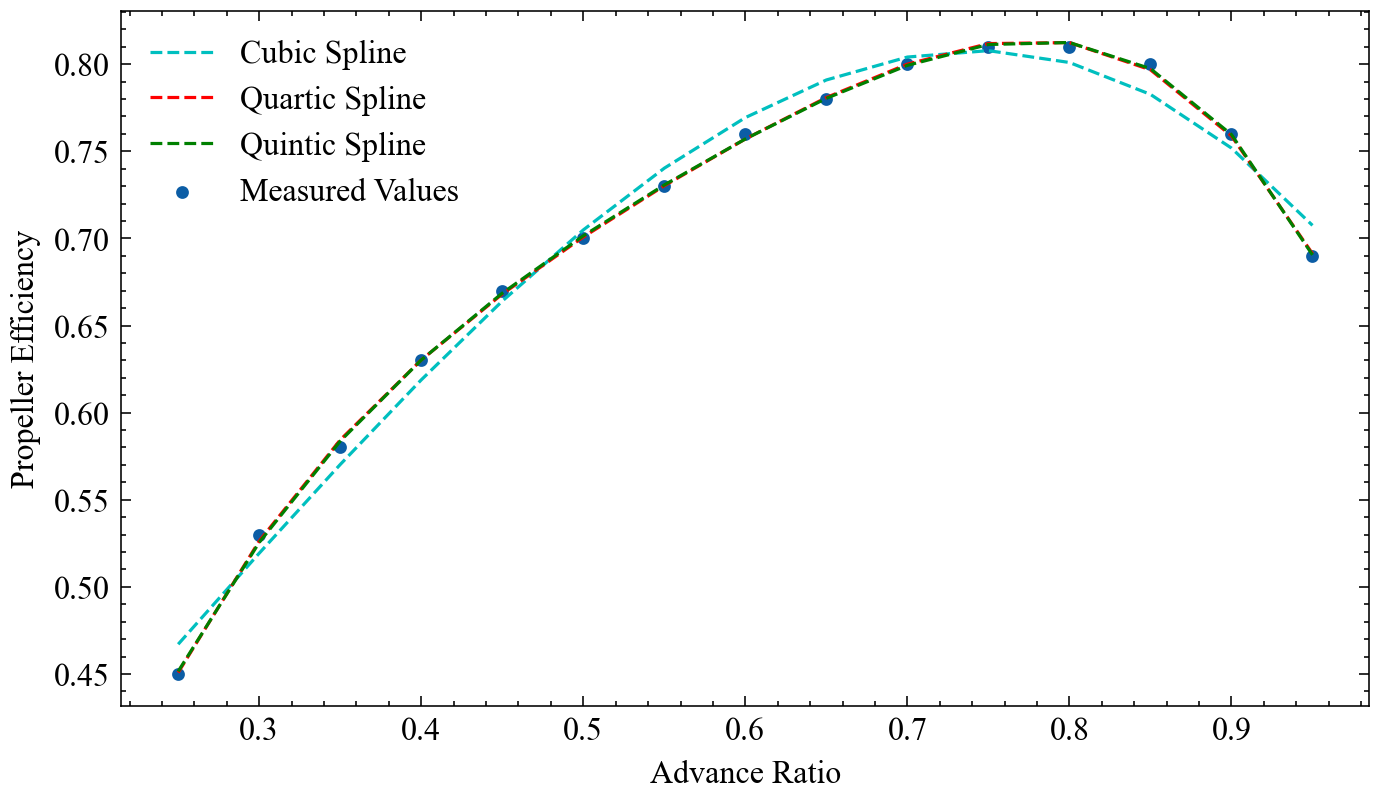

In [13]:
# finding propeller efficiency
adv_ratio = np.linspace(0.25, 0.95, 15)
prop_eff = np.array([0.45, 0.53, 0.58, 0.63, 0.67, 0.70, 0.73, 0.76, 0.78, 0.80, 0.81, 0.81, 0.80, 0.76, 0.69])
prop_eff_interp_3 = interpolate.UnivariateSpline(adv_ratio, prop_eff)
prop_eff_interp_4 = interpolate.UnivariateSpline(adv_ratio, prop_eff, k=4)
prop_eff_interp_5 = interpolate.UnivariateSpline(adv_ratio, prop_eff, k=5)

plt.figure(dpi=230, figsize=(7,4))
plt.style.use(['science', 'no-latex'])

plt.scatter(adv_ratio, prop_eff, marker='.', label='Measured Values')
plt.plot(adv_ratio, prop_eff_interp_3(adv_ratio), color='c', linestyle='--', label='Cubic Spline')
plt.plot(adv_ratio, prop_eff_interp_4(adv_ratio), color='r', linestyle='--', label='Quartic Spline')
plt.plot(adv_ratio, prop_eff_interp_5(adv_ratio), color='g', linestyle='--', label='Quintic Spline')

plt.xlabel('Advance Ratio')
plt.ylabel('Propeller Efficiency')
plt.legend()

plt.show()